In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

In [2]:
def RungeKutta(a, b, n, F, Y0):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.zeros((Y0.shape[0], n + 1))
    y[:, 0] = Y0

    for i in range(1, n + 1):
        K1 = F(t[i - 1], y[:, i - 1])
        K2 = F(t[i - 1]+ h, y[:, i - 1] + h * K1)
        y[:, i] = y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)

    return t, y

def Heun_1var(a,b,N,F,y0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0

    for k in range(1, N + 1):
        K1 = F(t[k - 1], y[k - 1])
        K2 = F(t[k - 1] + (2 / 3) * h, y[k - 1] + (2 / 3) * h * K1)
        y[k] = y[k - 1] + (K1 + 3 * K2) * h / 4

    return t, y


## Ejercicio 1

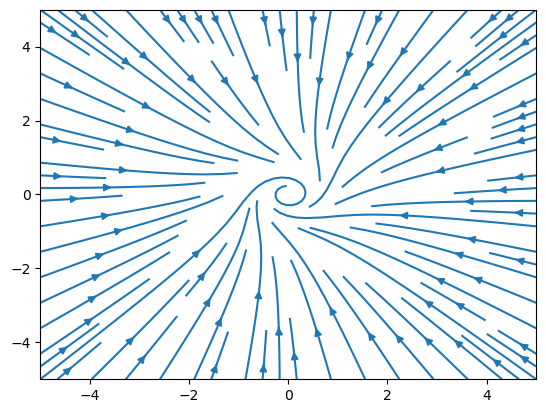

In [8]:
a=-1

def ej_1(X):
    x,y = X
    dxdt=y+a*x*(x**2+y**2)
    dydt=-x+a*y*(x**2+y**2)
    return np.array([dxdt,dydt])

x_vals=np.linspace(-5,5,1000)
y_vals=np.linspace(-5,5,1000)
X,Y=np.meshgrid(x_vals,y_vals)
espacio=np.array([X,Y])

DX,DY=ej_1(espacio)

plt.streamplot(X,Y,DX,DY,density=1,broken_streamlines=True)
plt.show()

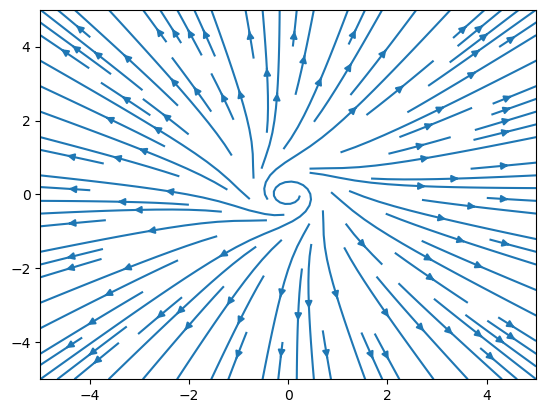

In [9]:
a=1

def ej_1(X):
    x,y = X
    dxdt=y+a*x*(x**2+y**2)
    dydt=-x+a*y*(x**2+y**2)
    return np.array([dxdt,dydt])

x_vals=np.linspace(-5,5,1000)
y_vals=np.linspace(-5,5,1000)
X,Y=np.meshgrid(x_vals,y_vals)
espacio=np.array([X,Y])

DX,DY=ej_1(espacio)

plt.streamplot(X,Y,DX,DY,density=1,broken_streamlines=True)
plt.show()

## Ejercicio 2


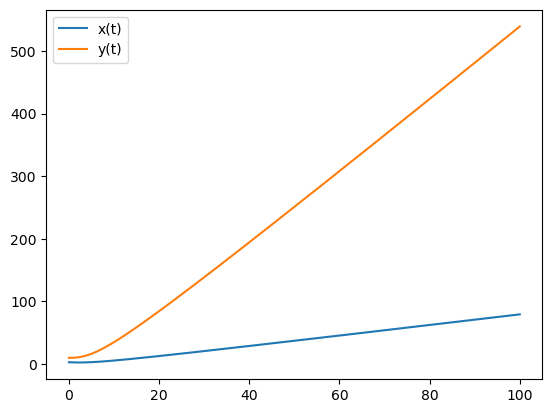

In [46]:
def F2(t,X):
    x1,x2,y1,y2=X
    dx1dt=x2
    dx2dt=x1/((x1**2+x2**2)**(3/2))
    dy1dt=y2
    dy2dt=y1/((x1**2+x2**2)**(3/2))
    return np.array([dx1dt,dx2dt,dy1dt,dy2dt])

Y0=np.array([3,-0.3,10,-0.01])

t,Sol=RungeKutta(0,100,1000,F2,Y0)

plt.plot(t,Sol[0],label="x(t)")
plt.plot(t,Sol[2],label="y(t)")
plt.legend()
plt.show()

Vemos como se aleja en ambas direcciones gracias a la fuerza repulsiva

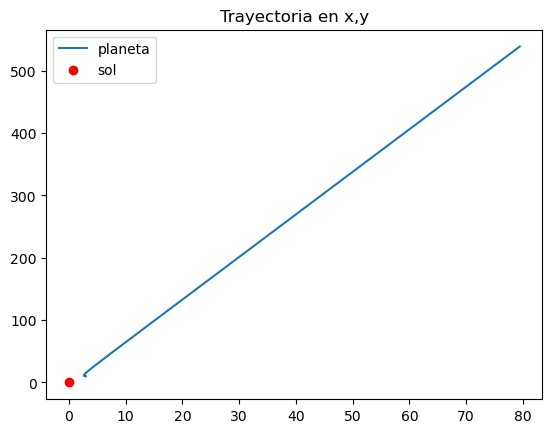

In [47]:
plt.plot(Sol[0],Sol[2],label="planeta")
plt.scatter(0,0,color='r',label="sol")
plt.legend()
plt.title("Trayectoria en x,y")
plt.show()

Vemos como sale disparado en dirección contraria al sol a pesar de que su velocidad inicial lo hace ir directo a él.

In [62]:
#Tomamos siempre mismos datos iniciales y variamos r
def ej2_2(r):
    def F2(t,X):
        x1,x2,y1,y2=X
        dx1dt=x2
        dx2dt=-x1/((x1**2+x2**2)**r)
        dy1dt=y2
        dy2dt=-y1/((x1**2+x2**2)**r)
        return np.array([dx1dt,dx2dt,dy1dt,dy2dt])

    Y0=np.array([3,-0.3,10,-0.01])

    t,Sol=RungeKutta(0,500,1000,F2,Y0)

    plt.plot(Sol[0],Sol[2],label="planeta")
    plt.scatter(0,0,color='r',label="sol")
    plt.scatter(3,10,color="g",label="punto inicial del planeta")
    plt.legend()
    plt.show()

interact(
    ej2_2,
    r=FloatSlider(min=-2, max=2, value=0.1,step=0.1, description='r')
    )

interactive(children=(FloatSlider(value=0.1, description='r', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.ej2_2(r)>

A r más altos el planeta va ganando "envion" aumentando el modulo de su velocidad cada vez que pasa cerca del sol, hasta finalmente  en casos como 1.6 o más altos de finalmente irse eyectados, incluso cuando es el caso del sistema atractivo. Esto sucede porque cuando nos acercamos al sol, x,y tienden a 0, en valores muy chicos y al r ser más grande, queda un denominador más pequeño (porque para valores entre 0 y 1, con un exponente más grande se hace más chico), luego el denominador se achica y la aceleración explota.

Cuando r tiende a 0, si bien uno pensaría que no pasa lo mismo, si aumentamos el tiempo vemos como se va alejando con más ciclos alrededor del sol, pero finalmente se va alejando de a poco.

en r=0 el planeta se va a alejando del sol en elipses.

## Ejercicio 3

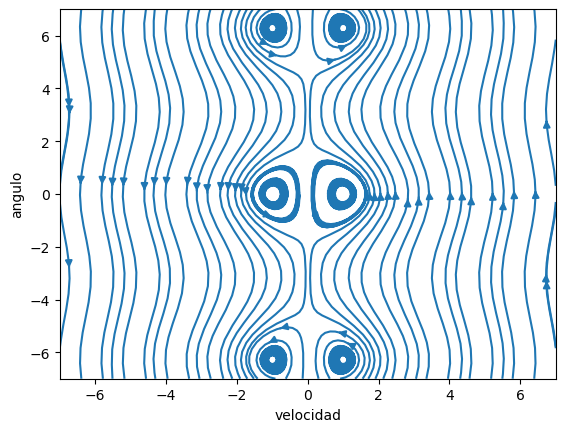

In [67]:
def F3_1(X):
    vel,tita=X
    dveldt=-np.sin(tita)
    dtitadt=-np.cos(tita)/vel+vel
    return np.array([dveldt,dtitadt])

vel_vals=np.linspace(-7,7,1000)
tita_vals=np.linspace(-7,7,1000)

V,T=np.meshgrid(vel_vals,tita_vals)
espacio=np.array([V,T])

DV,DT=F3_1(espacio)

plt.streamplot(V,T,DV,DT,density=0.8,broken_streamlines=False)
plt.xlabel("velocidad")
plt.ylabel("angulo")
plt.show()

Si el avión tiene velocidad en módulo suficiente su angulo con la horizontal va dando vueltas completas, lo que puede interpretarse como que la punta del avion va dando una vuelta (haciendo un giro en el aire). Vemos como la velocidad baja en módulo en los múltiplos impares de pi y sube en módulo en los múltiplos pares de pi. Es decir cuando el avión esta vertical baja la velocidad y cuando está en horizonal la sube. Y si la velocidad en módulo no es muy grande, la solución queda sando vuelta en los centros que se forman, donde se entiende que el avion sube y baja la punta periódicamente sin dar la vuelta, bajando y subiendo la velocidad.

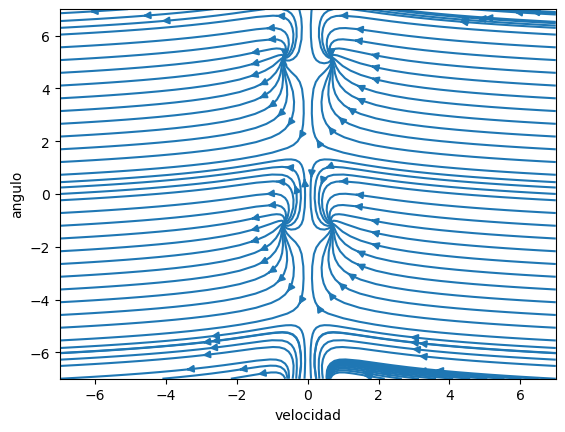

In [69]:
D=2

def F3_1(X):
    vel,tita=X
    dveldt=-np.sin(tita)-(D*(vel**2))
    dtitadt=-np.cos(tita)/vel+vel
    return np.array([dveldt,dtitadt])

vel_vals=np.linspace(-7,7,1000)
tita_vals=np.linspace(-7,7,1000)

V,T=np.meshgrid(vel_vals,tita_vals)
espacio=np.array([V,T])

DV,DT=F3_1(espacio)

plt.streamplot(V,T,DV,DT,density=1,broken_streamlines=False)
plt.xlabel("velocidad")
plt.ylabel("angulo")
plt.show()

Ahora tenemos puntos de equilibrio estables donde la velocidad es positiva e inestables donde la velocidad es negativa. Vemos graficamente que el avión si viene con una velocidad grande en módulo se mantiene en ese angulo, planeando. Si es negativa, disminuye más hacia infinito, lo que nos dice que el avión va para atrás y si el angulo respect de la horizontal no es 2pi*k se va a chocar con el piso (todo esto no tiene mucho sentido fisico). si tengo velocidad positiva alta, el avion va desacelerando hasta caer en un punto de equilibrio, donde planea en un angulo y velocidad constantes.

## Ejercicio 4

In [5]:
def ej_4(R):
    def F4(t,h):
        dhdt=1-(np.sqrt(h)/R)
        return dhdt
    
    h0=10
    t,Sol=Heun_1var(0,300,10000,F4,h0)

    plt.plot(t,Sol,label=f"R={R}")

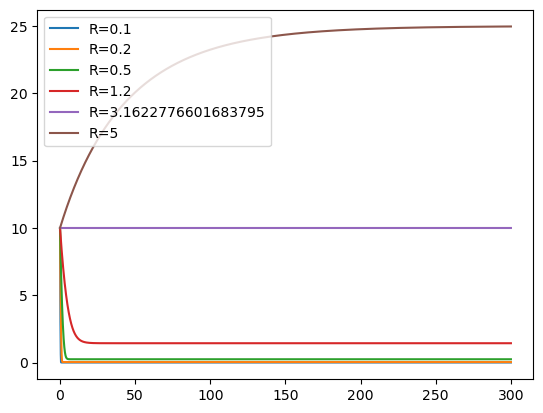

In [6]:
ej_4(0.1)
ej_4(0.2)
ej_4(0.5)
ej_4(1.2)
ej_4(np.sqrt(10))
ej_4(5)

plt.legend()
plt.show()

cuando r es la raiz del dato inicial, la derivada da siempre 0 y se mantiene constante. De todas formas, sabemos que hay un equilibrio estable, traducido al sistema real en $(qe * R)^2$ que es $R^2$ porque $qe = 1$ y eso es lo que estamos viendo.